# Load the historical data from MQL5

In [1]:
import pandas as pd

# assign variable to the historical data
file_path = '<file path>'

data = pd.read_csv(file_path, delimiter='\t')

# Display the first few rows and column names
print(data.head())
print(data.columns)

       <DATE>    <TIME>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  <TICKVOL>  <VOL>  \
0  2015.10.01  00:00:00  1115.10  1119.13  1111.00  1113.37      55121      0   
1  2015.10.02  00:00:00  1112.94  1141.22  1104.61  1137.69      72993      0   
2  2015.10.05  00:00:00  1137.58  1141.91  1130.07  1135.53      68208      0   
3  2015.10.06  00:00:00  1135.14  1151.16  1134.94  1147.00      58665      0   
4  2015.10.07  00:00:00  1146.57  1153.54  1141.79  1145.36      64191      0   

   <SPREAD>  
0         0  
1         0  
2         0  
3         0  
4         0  
Index(['<DATE>', '<TIME>', '<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<TICKVOL>',
       '<VOL>', '<SPREAD>'],
      dtype='object')


In [2]:
data.index

RangeIndex(start=0, stop=29845, step=1)

<Axes: xlabel='<DATE>'>

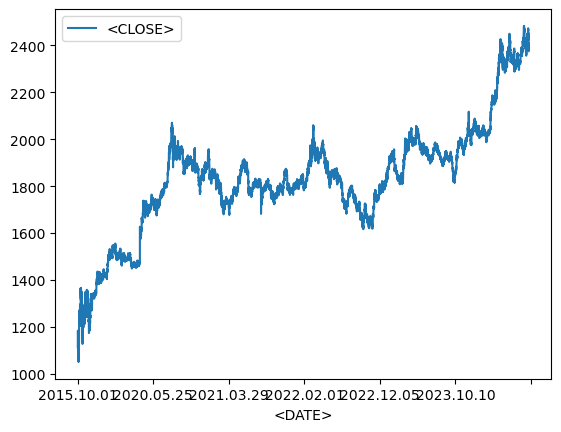

In [3]:
data.plot.line(y = "<CLOSE>", x = "<DATE>", use_index = True)

# Data cleanig

In [4]:
del data["<VOL>"]
del data["<SPREAD>"]


In [5]:
data.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>
0,2015.10.01,00:00:00,1115.10,1119.13,1111.00,1113.37,55121
1,2015.10.02,00:00:00,1112.94,1141.22,1104.61,1137.69,72993
2,2015.10.05,00:00:00,1137.58,1141.91,1130.07,1135.53,68208
3,2015.10.06,00:00:00,1135.14,1151.16,1134.94,1147.00,58665
4,2015.10.07,00:00:00,1146.57,1153.54,1141.79,1145.36,64191


In [6]:
# We add a colunm for tommorows price
data["<NexH>"] = data["<CLOSE>"].shift(-1)

In [7]:
data.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<NexH>
0,2015.10.01,00:00:00,1115.10,1119.13,1111.00,1113.37,55121,1137.69
1,2015.10.02,00:00:00,1112.94,1141.22,1104.61,1137.69,72993,1135.53
2,2015.10.05,00:00:00,1137.58,1141.91,1130.07,1135.53,68208,1147.00
3,2015.10.06,00:00:00,1135.14,1151.16,1134.94,1147.00,58665,1145.36
4,2015.10.07,00:00:00,1146.57,1153.54,1141.79,1145.36,64191,1138.85


Based on tomorrows price we can then have a target

In [8]:
data["<TRGT>"] = (data["<NexH>"] > data["<CLOSE>"]).astype(int)

In [9]:
data

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<NexH>,<TRGT>
0,2015.10.01,00:00:00,1115.10,1119.13,1111.00,1113.37,55121,1137.69,1
1,2015.10.02,00:00:00,1112.94,1141.22,1104.61,1137.69,72993,1135.53,0
2,2015.10.05,00:00:00,1137.58,1141.91,1130.07,1135.53,68208,1147.00,1
3,2015.10.06,00:00:00,1135.14,1151.16,1134.94,1147.00,58665,1145.36,0
4,2015.10.07,00:00:00,1146.57,1153.54,1141.79,1145.36,64191,1138.85,0
...,...,...,...,...,...,...,...,...,...
29840,2024.08.05,19:00:00,2402.75,2408.77,2399.02,2403.03,10502,2405.01,1
29841,2024.08.05,20:00:00,2402.96,2406.60,2400.25,2405.01,9233,2404.93,0
29842,2024.08.05,21:00:00,2405.01,2408.81,2403.81,2404.93,7094,2407.67,1
29843,2024.08.05,22:00:00,2404.95,2413.00,2404.62,2407.67,6639,2409.33,1


In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 50, min_samples_split = 50, random_state = 1)

train = data.iloc[:-50]
test = data.iloc[-50:]

predictors = ["<CLOSE>","<TICKVOL>", "<OPEN>", "<HIGH>", "<LOW>"]
model.fit(train[predictors], train["<TRGT>"])

RandomForestClassifier(min_samples_split=50, n_estimators=50, random_state=1)

# Measure how accurate the model is

In [11]:
from sklearn.metrics import precision_score

prcsn = model.predict(test[predictors])

In [12]:
prcsn = pd.Series(prcsn, index = test.index)

In [13]:
precision_score(test["<TRGT>"], prcsn)

0.5

In [14]:
cmbnd = pd.concat([test["<TRGT>"], prcsn], axis = 1)

<Axes: >

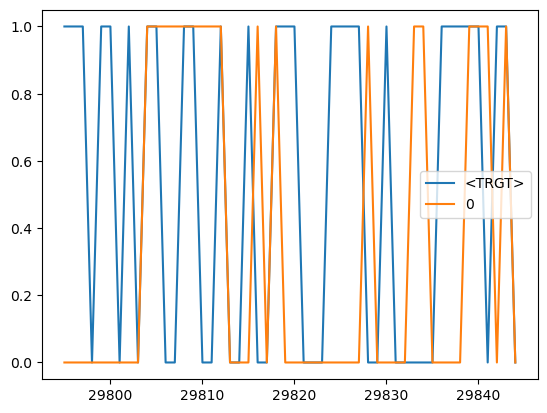

In [15]:
cmbnd.plot()

In [16]:
def predors(train, test, predictors, model):
    model.fit(train[predictors], train["<TRGT>"])
    prcsn = model.predict(test[predictors])
    prcsn = pd.Series(prcsn, index = test.index, name = "Predictions")
    cmbnd = pd.concat([test["<TRGT>"], prcsn], axis = 1)
    return cmbnd

In [17]:
def backtestor(data, model, predictors, start = 2500, step = 250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i + step)].copy()
        predictions = predors(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [18]:
predictions = backtestor(data, model, predictors)

In [19]:
predictions["Predictions"].value_counts()

Predictions
1    14755
0    12590
Name: count, dtype: int64

In [20]:
precision_score(predictions["<TRGT>"], predictions["Predictions"])

0.5096577431379193

In [21]:
predictions["<TRGT>"].value_counts() / predictions.shape[0]

<TRGT>
1    0.507479
0    0.492521
Name: count, dtype: float64

In [22]:

horizons = [2, 5, 55, 125, 750]
new_predictors = []

# Ensure only numeric columns are used for rolling calculations
numeric_columns = data.select_dtypes(include=[float, int]).columns

for i in horizons:
    # Calculate rolling averages for numeric columns only
    rolling_averages = data[numeric_columns].rolling(i).mean()
    
    # Generate the ratio column
    ratio_column = f"Close_Ratio_{i}"
    data[ratio_column] = data["<CLOSE>"] / rolling_averages["<CLOSE>"]
    
    # Generate the trend column
    trend_column = f"Trend_{i}"
    data[trend_column] = data["<TRGT>"].shift(1).rolling(i).sum()
    
    new_predictors += [ratio_column, trend_column]


In [23]:
data

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<NexH>,<TRGT>,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_55,Trend_55,Close_Ratio_125,Trend_125,Close_Ratio_750,Trend_750
0,2015.10.01,00:00:00,1115.10,1119.13,1111.00,1113.37,55121,1137.69,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015.10.02,00:00:00,1112.94,1141.22,1104.61,1137.69,72993,1135.53,0,1.010804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015.10.05,00:00:00,1137.58,1141.91,1130.07,1135.53,68208,1147.00,1,0.999050,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015.10.06,00:00:00,1135.14,1151.16,1134.94,1147.00,58665,1145.36,0,1.005025,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015.10.07,00:00:00,1146.57,1153.54,1141.79,1145.36,64191,1138.85,0,0.999285,1.0,1.008426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29840,2024.08.05,19:00:00,2402.75,2408.77,2399.02,2403.03,10502,2405.01,1,1.000060,2.0,1.003729,4.0,0.985369,28.0,0.992429,66.0,1.008624,405.0
29841,2024.08.05,20:00:00,2402.96,2406.60,2400.25,2405.01,9233,2404.93,0,1.000412,2.0,1.001999,5.0,0.986393,29.0,0.993202,67.0,1.009416,405.0
29842,2024.08.05,21:00:00,2405.01,2408.81,2403.81,2404.93,7094,2407.67,1,0.999983,1.0,1.001016,4.0,0.986566,29.0,0.993121,67.0,1.009342,405.0
29843,2024.08.05,22:00:00,2404.95,2413.00,2404.62,2407.67,6639,2409.33,1,1.000569,1.0,1.001245,4.0,0.987893,29.0,0.994204,67.0,1.010450,405.0


Handle NAN values

In [24]:
data = data.dropna()

In [25]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["<TRGT>"])
    prcsn = model.predict_proba(test[predictors])[:1]
    prcsn[prcsn >= .6] = 1
    prcsn[prcsn < .6] = 0
    prcsn = pd.Series(preds, index = test.index, name = "Predictions")
    cmbnd = pd.concat([test["<TRGT>"], prcsn], axis = 1)
    return cmbnd

In [26]:
predictions = backtestor(data, model, new_predictors)

In [27]:
predictions["Predictions"].value_counts()

Predictions
1    14349
0    12245
Name: count, dtype: int64

In [28]:
precision_score(predictions["<TRGT>"], predictions["Predictions"])

0.5175970450902502

In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import onnx
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Load and preprocess your data (example)
# Replace this with your actual data loading process
#data = pd.read_csv('your_data.csv')  # Replace with your actual data source
#data = data.dropna()

# Define predictors and target
predictors = ["<CLOSE>", "<TICKVOL>", "<OPEN>", "<HIGH>", "<LOW>"]
target = "<TRGT>"

# Split data into train and test sets
train, test = train_test_split(data, test_size=0.2, shuffle=False)

# Define and train the model
model = RandomForestClassifier(n_estimators=50, min_samples_split=50, random_state=1)
model.fit(train[predictors], train[target])

# Export the trained model to ONNX format
initial_type = [('float_input', FloatTensorType([None, len(predictors)]))]
onnx_model = convert_sklearn(model, initial_types=initial_type)

# Save the ONNX model to a file
with open("random_forest_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())
